<a href="https://colab.research.google.com/github/cppel/dz/blob/main/Task3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST
Техническая документация по датасету

1.1. Устанавливаем необходимые зависимости

In [1]:
from keras.datasets import fashion_mnist  # импорт исходного датасета
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np
from keras.optimizers import Adam
from keras.utils import to_categorical

1.2. Разделяем данные на обучающую и тестовую выборку

In [2]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

# Нормализуем
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255

trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

4422102/4422102 [==============================] - 1s 0us/step
Train: X =  (60000, 28, 28, 1)
Test: X =  (10000, 28, 28, 1)


1.3. Визуализируем часть данных из датасета

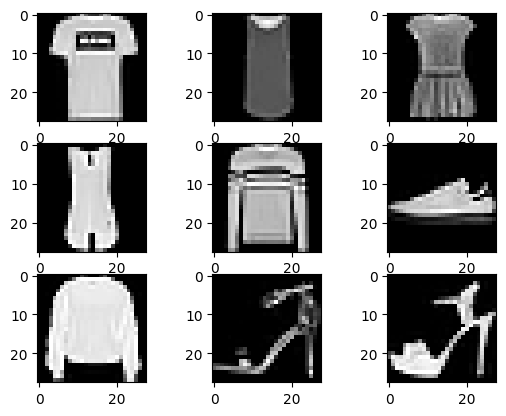

In [3]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

1.4. Создаём архитектуру нейронной сети и компилируем модель

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same',
           activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

1.5. Обучаем модель

In [5]:
%time
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


his = model.fit(trainX, trainY, batch_size=256,
                epochs=50, validation_data=(testX, testY))

model.evaluate(testX, testY)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.87 µs
Epoch 1/50
235/235 [==============================] - 10s 10ms/step - loss: 1.0829 - accuracy: 0.6849 - val_loss: 0.6018 - val_accuracy: 0.7812
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.5236 - accuracy: 0.8098 - val_loss: 0.4899 - val_accuracy: 0.8248
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.4467 - accuracy: 0.8413 - val_loss: 0.4374 - val_accuracy: 0.8440
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.4086 - accuracy: 0.8570 - val_loss: 0.4074 - val_accuracy: 0.8560
Epoch 5/50
235/235 [==============================] - 2s 6ms/step - loss: 0.3853 - accuracy: 0.8651 - val_loss: 0.4023 - val_accuracy: 0.8542
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.3667 - accuracy: 0.8710 - val_loss: 0.3793 - val_accuracy: 0.8635
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.35

[0.2572043240070343, 0.907800018787384]

1.5. Анализируем обученную модель. Строим график (графики) обучения

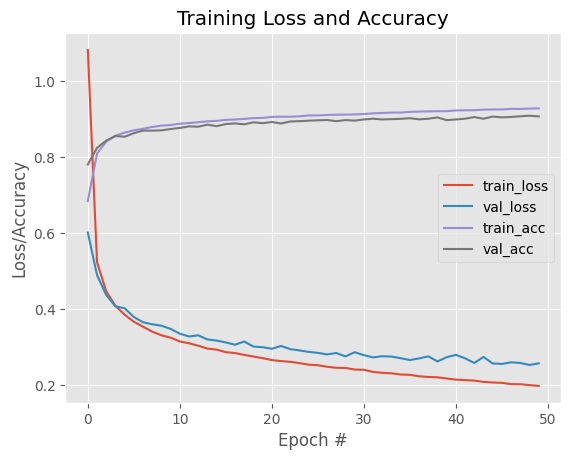

In [6]:
%matplotlib inline
# Графики потерь и точности
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, his.history["loss"], label="train_loss")
plt.plot(N, his.history["val_loss"], label="val_loss")
plt.plot(N, his.history["accuracy"], label="train_acc")
plt.plot(N, his.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

1.6. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети

In [19]:
import cv2


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


def test_predict(image_path):
    image = cv2.imread(image_path)
    output = image.copy()
    image = cv2.resize(image, (28, 28))
    image = cv2.bitwise_not(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = image.astype("float") / 255.0
    image = image.reshape(-1, 28, 28, 1)
    preds = model.predict(image)
    i = preds.argmax(axis=1)[0]
    for index, pred in enumerate(preds[0]):
        print(f"{class_names[index]}:{pred * 100:.2f}%", end="; ")
    print()
    text = "{}: {:.2f}%".format(class_names[i], preds[0][i] * 100)
    _ = cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                    (0, 0, 255), 2)
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 18ms/step
T-shirt/top:0.00%; Trouser:0.00%; Pullover:0.00%; Dress:0.00%; Coat:0.00%; Sandal:1.13%; Shirt:0.00%; Sneaker:98.53%; Bag:0.22%; Ankle boot:0.12%; 


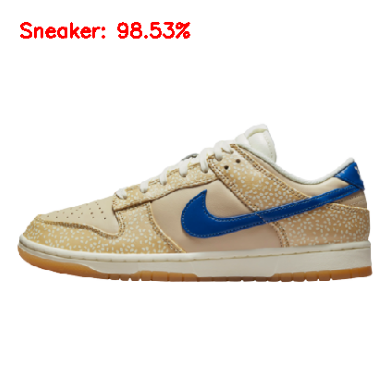

In [20]:
# Изображение кросовок
test_predict("/content/dataset/fashion/fashion_test_1.png")

1/1 [==============================] - 0s 20ms/step
T-shirt/top:0.03%; Trouser:0.00%; Pullover:0.00%; Dress:0.00%; Coat:0.00%; Sandal:99.14%; Shirt:0.00%; Sneaker:0.33%; Bag:0.36%; Ankle boot:0.14%; 


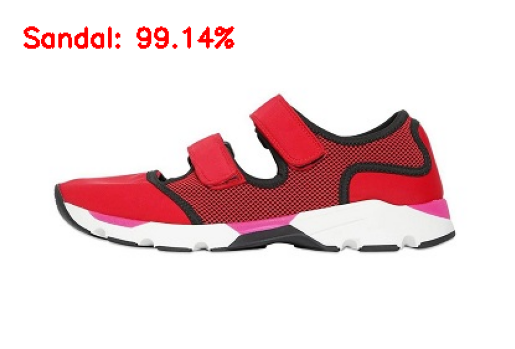

In [23]:
# Изображение кросовок
test_predict("/content/dataset/fashion/fashion_test_2.jpg")

1/1 [==============================] - 0s 18ms/step
T-shirt/top:65.91%; Trouser:0.00%; Pullover:0.34%; Dress:0.00%; Coat:0.04%; Sandal:0.01%; Shirt:11.52%; Sneaker:0.00%; Bag:22.17%; Ankle boot:0.00%; 


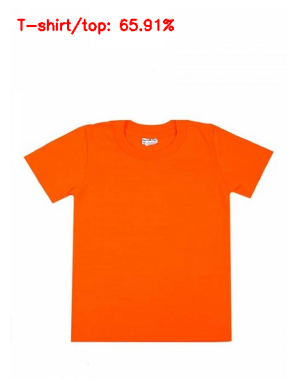

In [24]:
# Изображение футболки
test_predict("/content/dataset/fashion/fashion_test_3.jpg")

1/1 [==============================] - 0s 19ms/step
T-shirt/top:4.25%; Trouser:0.73%; Pullover:23.65%; Dress:0.00%; Coat:55.48%; Sandal:0.00%; Shirt:14.57%; Sneaker:0.00%; Bag:1.30%; Ankle boot:0.02%; 


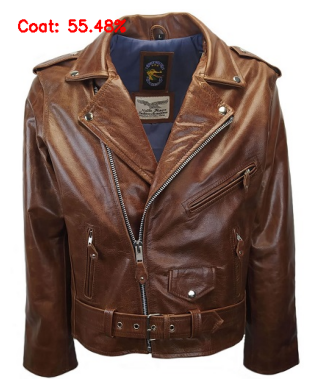

In [25]:
# Изображение куртки
test_predict("/content/dataset/fashion/fashion_test_4.jpg")

1/1 [==============================] - 0s 18ms/step
T-shirt/top:0.18%; Trouser:0.00%; Pullover:0.50%; Dress:0.00%; Coat:0.03%; Sandal:0.20%; Shirt:0.01%; Sneaker:0.00%; Bag:99.08%; Ankle boot:0.00%; 


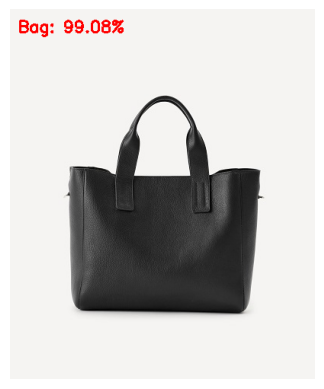

In [26]:
# Изображение сумки
test_predict("/content/dataset/fashion/fashion_test_5.jpg")

1/1 [==============================] - 0s 18ms/step
T-shirt/top:9.17%; Trouser:0.64%; Pullover:0.02%; Dress:84.04%; Coat:0.03%; Sandal:0.01%; Shirt:5.93%; Sneaker:0.08%; Bag:0.07%; Ankle boot:0.00%; 


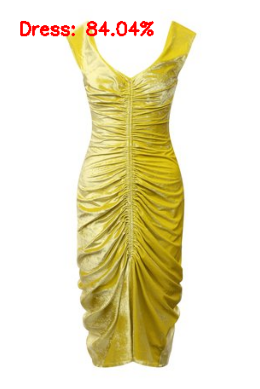

In [27]:
# Изображение плятья
test_predict("/content/dataset/fashion/fashion_test_6.jpg")

Вывод.
Как видно модели удалось верно определять 6 из 6 изображений.